# WeatherPy

### Scatter Plots

This file contains the following:

- Linear regression graphs that showcase the following relationships for two hemispheres:


    - Northern Hemisphere - Temperature (F) vs. Latitude
    - Southern Hemisphere - Temperature (F) vs. Latitude
    - Northern Hemisphere - Humidity (%) vs. Latitude
    - Southern Hemisphere - Humidity (%) vs. Latitude
    - Northern Hemisphere - Cloudiness (%) vs. Latitude
    - Southern Hemisphere - Cloudiness (%) vs. Latitude
    - Northern Hemisphere - Wind Speed (mph) vs. Latitude
    - Southern Hemisphere - Wind Speed (mph) vs. Latitude
    
- The coefficient of determination, or R-Squared value, is calculated for each regression. The R-Squared value is a statistical measure of how well the regression predictions approximate the real data points. The closer the value is to 1, the better the predictions fit the data.
- The calculated probability, or P-Value is also calculated for each regression. A P-Value less than 0.05 is statistically significant and a P-Value less than 0.001 is statistically highly significant.
- Weather data was collected from OpenWeatherMap.org on September 23, 2019 around 22:44 (PDT).

In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sb

# Set all graphs to seaborn format

sb.set()

# Read the clean weather data

cities_weather_data = pd.read_csv("output_data/clean_cities_weather_data.csv", delimiter=",",low_memory=False)

# Display the first few rows of data

cities_weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1569303867,81,-54.81,-68.31,44.60,5.82
1,kapaa,90,US,1569303701,83,22.08,-159.32,80.60,6.93
2,kavaratti,75,IN,1569303892,79,10.57,72.64,84.20,4.70
3,rikitea,74,PF,1569303892,72,-23.12,-134.97,69.89,12.80
4,weinan,0,CN,1569303893,60,34.50,109.46,78.01,2.24


In [2]:
# Set the x and y variables for graphing
# Use loc() on the latitude data to find the values greater than zero for the northern hemisphere cities
# Create lists of the data corresponding to the latitude row

x_north_hemi = list(cities_weather_data.loc[cities_weather_data["Lat"]>0, "Lat"])
y_north_temp = list(cities_weather_data.loc[cities_weather_data["Lat"]>0,"Max Temp"])
y_north_humidity = list(cities_weather_data.loc[cities_weather_data["Lat"]>0,"Humidity"])
y_north_cloud = list(cities_weather_data.loc[cities_weather_data["Lat"]>0,"Cloudiness"])
y_north_wind = list(cities_weather_data.loc[cities_weather_data["Lat"]>0,"Wind Speed"])

# Use loc() on the latitude data to find the values less than zero for the southern hemisphere cities
# Create lists of the data corresponding to the latitude row

x_south_hemi = list(cities_weather_data.loc[cities_weather_data["Lat"]<0, "Lat"])
y_south_temp = list(cities_weather_data.loc[cities_weather_data["Lat"]<0,"Max Temp"])
y_south_humidity = list(cities_weather_data.loc[cities_weather_data["Lat"]<0,"Humidity"])
y_south_cloud = list(cities_weather_data.loc[cities_weather_data["Lat"]<0,"Cloudiness"])
y_south_wind = list(cities_weather_data.loc[cities_weather_data["Lat"]<0,"Wind Speed"])

In [3]:
# Make sure no data was dropped

print(f"Total Northern Cities: {len(x_north_hemi)}")
print(f"Total Southern Cities: {len(x_south_hemi)}")
print(f"Total Cities: {len(x_north_hemi+x_south_hemi)}")

Total Northern Cities: 385
Total Southern Cities: 138
Total Cities: 523


### Northern Hemisphere - Max Temp vs. Latitude - Linear Regression


The following code and scatter plot analyze the temperatures of 385 random cities around the world in the Northern Hemisphere. As seen from the scatter plot and line regression, as the city latitude gets closer to the north pole, the temperature decreases significantly. The R-Squared value of the regression is 0.709697 which indicates that the regression prediction is close to the fit of the data. The P-Value is 6.6099296034158095e-105 (less than 0.001) which means the data is statistcally highly significant. This means that as the latitude increases by one from the equator towards the North Pole, the temperature will decrease by about -0.71 F.

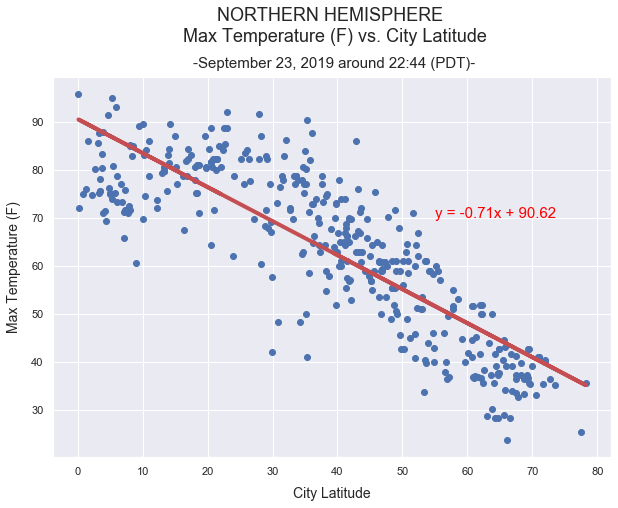

In [4]:
# Set figure size

fig_1 = plt.figure(figsize=(10,7))

# Plot the northern latitude and max temperature data as a scatter plot

plt.scatter(x_north_hemi, y_north_temp, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("NORTHERN HEMISPHERE \n Max Temperature (F) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Max Temperature (F)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = linregress(x_north_hemi, y_north_temp)
n_temp_fit = n_temp_slope*np.asarray(x_north_hemi)+n_temp_int
n_temp_line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_int,2))
plt.annotate(n_temp_line_eq,(55, 70),fontsize=15,color="red")
plt.plot(x_north_hemi,n_temp_fit,"r-",linewidth=4)

# Save the figure

fig_1.savefig('output_data/North_Max_Temp_vs_Lat.png')

# Show plot

plt.show()

In [5]:
linregress(x_north_hemi, y_north_temp)

LinregressResult(slope=-0.7081044671046215, intercept=90.6159802242027, rvalue=-0.8415430908335096, pvalue=1.7776218732995583e-104, stderr=0.02322566306274569)

In [6]:
print("R-squared: %f" % n_temp_r**2)
print(f"P-Value: {n_temp_p}")

R-squared: 0.708195
P-Value: 1.7776218732995583e-104


In [7]:
# Close the plot

plt.close()

 ### Southern Hemisphere - Max Temp vs. Latitude Linear Regression
 
 
The following code and scatter plot analyze the temperatures of 138 random cities around the world in the Southern Hemisphere. As seen from the scatter plot and line regression, as the city latitude gets closer to the equator, the temperature increases. The R-Squared value of the regression is 0.577098 which indicates that the regression prediction is close to the fit of the data. The P-Value is 3.433779388308689e-27 (less than 0.001) which means the data is statistcally highly significant. This means that as the latitude increases by one from the south pole towards the equator, the temperature will increase by about 0.66 F.

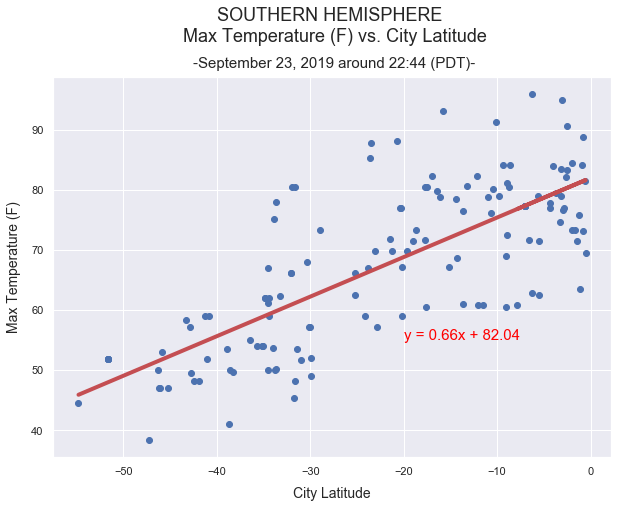

In [8]:
# Set figure size

fig_2 = plt.figure(figsize=(10,7))

# Plot the southern latitude and max temperature data as a scatter plot

plt.scatter(x_south_hemi, y_south_temp, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("SOUTHERN HEMISPHERE \n Max Temperature (F) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Max Temperature (F)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

s_temp_slope, s_temp_int, s_temp_r, s_temp_p, s_temp_std_err = linregress(x_south_hemi, y_south_temp)
s_temp_fit = s_temp_slope*np.asarray(x_south_hemi)+s_temp_int
s_temp_line_eq = "y = " + str(round(s_temp_slope,2)) + "x + " + str(round(s_temp_int,2))
plt.annotate(s_temp_line_eq,(-20, 55),fontsize=15,color="red")
plt.plot(x_south_hemi,s_temp_fit,"r-",linewidth=4)

# Save the figure

fig_2.savefig('output_data/South_Max_Temp_vs_Lat.png')

# Show plot

plt.show()

In [9]:
linregress(x_south_hemi, y_south_temp)

LinregressResult(slope=0.659110618332862, intercept=82.04482561786006, rvalue=0.7577718981260597, pvalue=5.460711290450563e-27, stderr=0.04866804266151018)

In [10]:
print("R-squared: %f" % s_temp_r**2)
print(f"P-Value: {s_temp_p}")

R-squared: 0.574218
P-Value: 5.460711290450563e-27


In [11]:
# Close the plot

plt.close()

### Northern Hemisphere - Humidity (%) vs. Latitude - Linear Regression


The following code and scatter plot analyze the humidity (%) of 385 random cities around the world in the Northern Hemisphere. As seen from the scatter plot and line regression, the correlation between the humidity and latitude is weak. The R-Squared value of the regression is 0.006921 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.10312715312341929 (more than 0.05) which means the humidity is not greatly affected as we move from the equator toward the north pole.

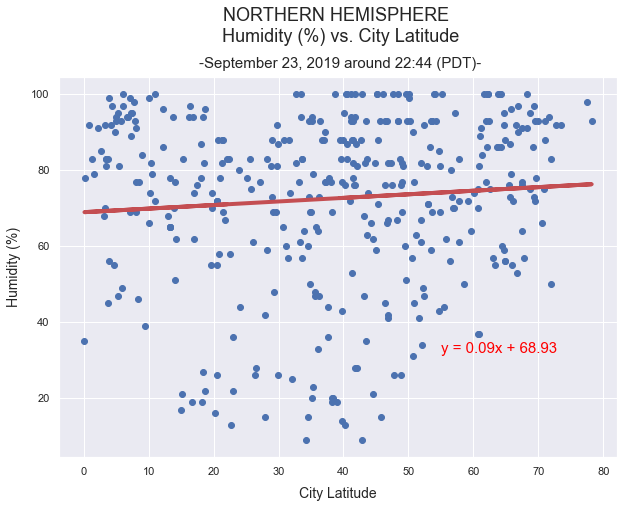

In [12]:
# Set figure size

fig_3 = plt.figure(figsize=(10,7))

# Plot the northern latitude and humidity data as a scatter plot

plt.scatter(x_north_hemi, y_north_humidity, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("NORTHERN HEMISPHERE \n Humidity (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

n_humid_slope, n_humid_int, n_humid_r, n_humid_p, n_humid_std_err = linregress(x_north_hemi, y_north_humidity)
n_humid_fit = n_humid_slope*np.asarray(x_north_hemi)+n_humid_int
n_humid_line_eq = "y = " + str(round(n_humid_slope,2)) + "x + " + str(round(n_humid_int,2))
plt.annotate(n_humid_line_eq,(55, 32),fontsize=15,color="red")
plt.plot(x_north_hemi,n_humid_fit,"r-",linewidth=4)

# Save the figure

fig_3.savefig('output_data/North_Humidity_vs_Lat.png')

# Show plot

plt.show()

In [13]:
linregress(x_north_hemi, y_north_humidity)

LinregressResult(slope=0.09409492012953495, intercept=68.93002029708124, rvalue=0.08308637546686362, pvalue=0.1035700632535679, stderr=0.057667714072495595)

In [14]:
print("R-squared: %f" % n_humid_r**2)
print(f"P-Value: {n_humid_p}")

R-squared: 0.006903
P-Value: 0.1035700632535679


In [15]:
# Close the plot

plt.close()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression



The following code and scatter plot analyze the humidity (%) of 138 random cities around the world in the Southern Hemisphere. As seen from the scatter plot and line regression, the correlation between the humidity and latitude is weak. The R-Squared value of the regression is 0.003830 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.47085778208929885 (more than 0.05) which means the humidity is not greatly affected as we move from the south pole toward the equator.

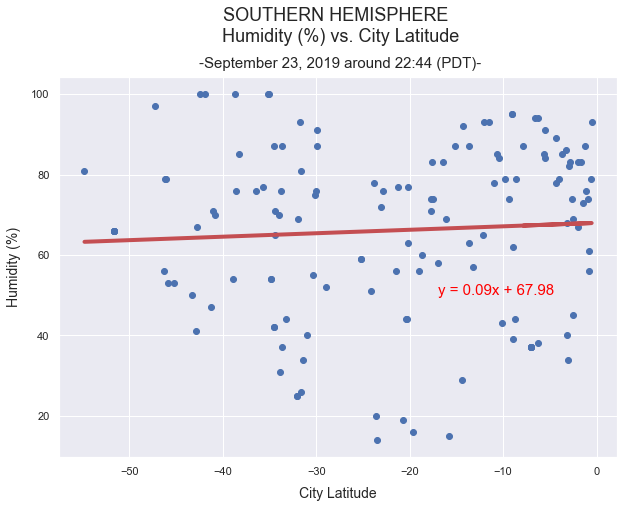

In [16]:
# Set figure size

fig_4 = plt.figure(figsize=(10,7))

# Plot the southern latitude and humidity data as a scatter plot

plt.scatter(x_south_hemi, y_south_humidity, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("SOUTHERN HEMISPHERE \n Humidity (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-", x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

s_humid_slope, s_humid_int, s_humid_r, s_humid_p, s_humid_std_err = linregress(x_south_hemi, y_south_humidity)
s_humid_fit = s_humid_slope*np.asarray(x_south_hemi)+s_humid_int
s_humid_line_eq = "y = " + str(round(s_humid_slope,2)) + "x + " + str(round(s_humid_int,2))
plt.annotate(s_humid_line_eq,(-17, 50),fontsize=15,color="red")
plt.plot(x_south_hemi,s_humid_fit,"r-",linewidth=4)

# Save the figure

fig_4.savefig('output_data/South_Humidity_vs_Lat.png')

# Show plot

plt.show()

In [17]:
linregress(x_south_hemi, y_south_humidity)

LinregressResult(slope=0.08598548748056749, intercept=67.98485529187292, rvalue=0.061314937707312445, pvalue=0.47497473806230583, stderr=0.1200249417928932)

In [18]:
print("R-squared: %f" % s_humid_r**2)
print(f"P-Value: {s_humid_p}")

R-squared: 0.003760
P-Value: 0.47497473806230583


In [19]:
# Close the plot

plt.close()

 ### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
 
 
The following code and scatter plot analyze the cloudiness (%) of 385 random cities around the world in the Northern Hemisphere. As seen from the scatter plot and line regression, the correlation between the cloudiness and latitude is weak. The R-Squared value of the regression is 0.015159 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.01564114726787735 (less than 0.05 but greater than 0.01) which means that it is probable that as we move from the equator towards the north pole by 1 latitude, the cloudiness percentage may increase by 0.25%. However, because the prediction is not close to the fit, there may be a wide variance between the predicted and actual cloudiness percentage.

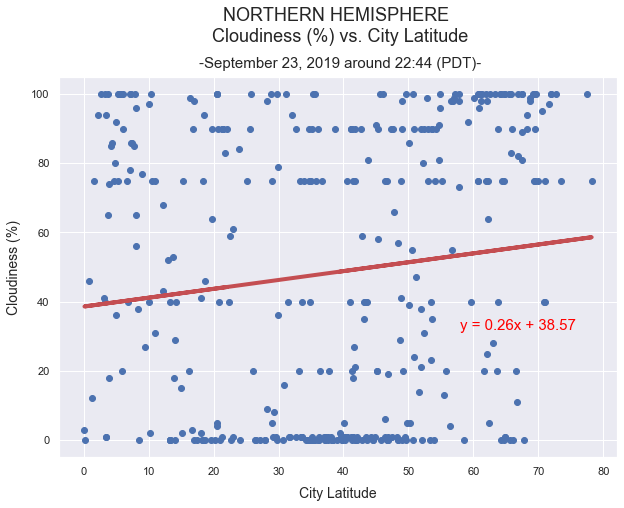

In [20]:
# Set figure size

fig_5 = plt.figure(figsize=(10,7))

# Plot the northern latitude and cloudiness data as a scatter plot

plt.scatter(x_north_hemi, y_north_cloud, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("NORTHERN HEMISPHERE \n Cloudiness (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-", x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

n_cloud_slope, n_cloud_int, n_cloud_r, n_cloud_p, n_cloud_std_err = linregress(x_north_hemi, y_north_cloud)
n_cloud_fit = n_cloud_slope*np.asarray(x_north_hemi)+n_cloud_int
n_cloud_line_eq = "y = " + str(round(n_cloud_slope,2)) + "x + " + str(round(n_cloud_int,2))
plt.annotate(n_cloud_line_eq,(58, 32),fontsize=15,color="red")
plt.plot(x_north_hemi,n_cloud_fit,"r-",linewidth=4)

# Save the figure

fig_5.savefig('output_data/North_Cloudiness_vs_Lat.png')

# Show plot
plt.show()

In [21]:
linregress(x_north_hemi, y_north_cloud)

LinregressResult(slope=0.2562642797474563, intercept=38.57327440024117, rvalue=0.12687648732888834, pvalue=0.012721285390661276, stderr=0.10237255486934188)

In [22]:
print("R-squared: %f" % n_cloud_r**2)
print(f"P-Value: {n_cloud_p}")

R-squared: 0.016098
P-Value: 0.012721285390661276


In [23]:
# Close the plot

plt.close()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The following code and scatter plot analyze the cloudiness (%) of 138 random cities around the world in the Southern Hemisphere. As seen from the scatter plot and line regression, the correlation between the cloudiness and latitude is weak. The R-Squared value of the regression is 0.020068 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.09744298278570798 (greater than 0.05) which means the cloudiness percentage is not greatly affected as we move from the south pole towards the equator.

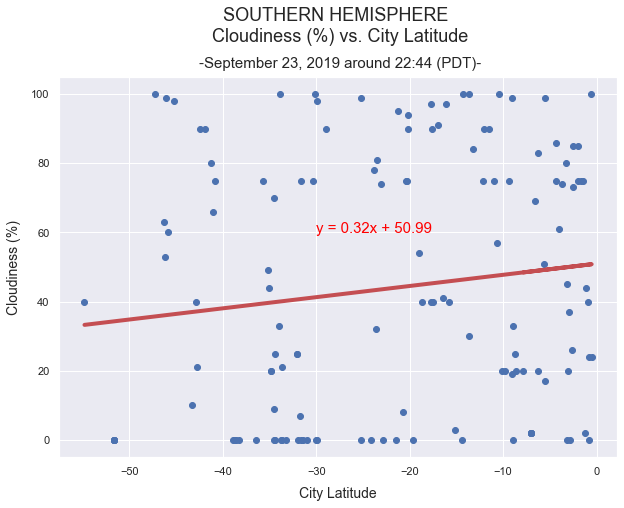

In [24]:
# Set figure size

fig_6 = plt.figure(figsize=(10,7))

# Plot the southern latitude and cloudiness data as a scatter plot

plt.scatter(x_south_hemi, y_south_cloud, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("SOUTHERN HEMISPHERE \n Cloudiness (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-", x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

s_cloud_slope, s_cloud_int, s_cloud_r, s_cloud_p, s_cloud_std_err = linregress(x_south_hemi, y_south_cloud)
s_cloud_fit = s_cloud_slope*np.asarray(x_south_hemi)+s_cloud_int
s_cloud_line_eq = "y = " + str(round(s_cloud_slope,2)) + "x + " + str(round(s_cloud_int,2))
plt.annotate(s_cloud_line_eq,(-30, 60),fontsize=15,color="red")
plt.plot(x_south_hemi,s_cloud_fit,"r-",linewidth=4)

# Save the figure

fig_6.savefig('output_data/South_Cloudiness_vs_Lat.png')

# Show plot

plt.show()

In [25]:
linregress(x_south_hemi, y_south_cloud)

LinregressResult(slope=0.3230867093041794, intercept=50.98612797890952, rvalue=0.13388775247677484, pvalue=0.1174479050667903, stderr=0.20505997951014132)

In [26]:
print("R-squared: %f" % s_cloud_r**2)
print(f"P-Value: {s_cloud_p}")

R-squared: 0.017926
P-Value: 0.1174479050667903


In [27]:
# Close the plot

plt.close()

 ### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
 
 
The following code and scatter plot analyze the wind speed in miles per hour of 385 random cities around the world in the Northern Hemisphere. As seen from the scatter plot and line regression, the correlation between the wind speed and latitude is weak. The R-Squared value of the regression is 0.038798 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.00010003571906327934 (less than 0.01 but greater than 0.001) which means that it is probable that as we move from the equator towards the north pole by 1 latitude, the wind speed may increase by 0.054 mph. However, because the prediction is not close to the fit, there may be a wide variance between the predicted and actual wind speed.

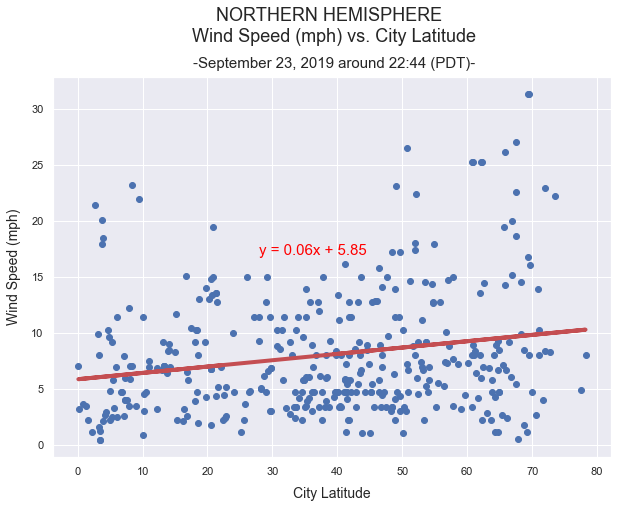

In [28]:
# Set figure size

fig_7 = plt.figure(figsize=(10,7))

# Plot the northern latitude and wind speed data as a scatter plot

plt.scatter(x_north_hemi, y_north_wind, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("NORTHERN HEMISPHERE \n Wind Speed (mph) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-", x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

n_wind_slope, n_wind_int, n_wind_r, n_wind_p, n_wind_std_err = linregress(x_north_hemi, y_north_wind)
n_wind_fit = n_wind_slope*np.asarray(x_north_hemi)+n_wind_int
n_wind_line_eq = "y = " + str(round(n_wind_slope,2)) + "x + " + str(round(n_wind_int,2))
plt.annotate(n_wind_line_eq,(28, 17),fontsize=15,color="red")
plt.plot(x_north_hemi,n_wind_fit,"r-",linewidth=4)

# Save the figure

fig_7.savefig('output_data/North_Wind_Speed_vs_Lat.png')

# Show plot

plt.show()

In [29]:
linregress(x_north_hemi, y_north_wind)

LinregressResult(slope=0.05665307514512179, intercept=5.848399662115405, rvalue=0.2041620851718335, pvalue=5.448428703003405e-05, stderr=0.013880457989579275)

In [30]:
print("R-squared: %f" % n_wind_r**2)
print(f"P-Value: {n_wind_p}")

R-squared: 0.041682
P-Value: 5.448428703003405e-05


In [31]:
# Close the plot

plt.close()

 ### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
 
 
The following code and scatter plot analyze the wind speed in miles per hour of 138 random cities around the world in the Southern Hemisphere. As seen from the scatter plot and line regression, the correlation between the wind speed and latitude is weak. The R-Squared value of the regression is 0.014621 which indicates that the regression prediction is not very close to the fit of the data. The P-Value is 0.15773743813982688 (greater than 0.05) which means the wind speed is not greatly affected as we move from the south pole towards the equator.

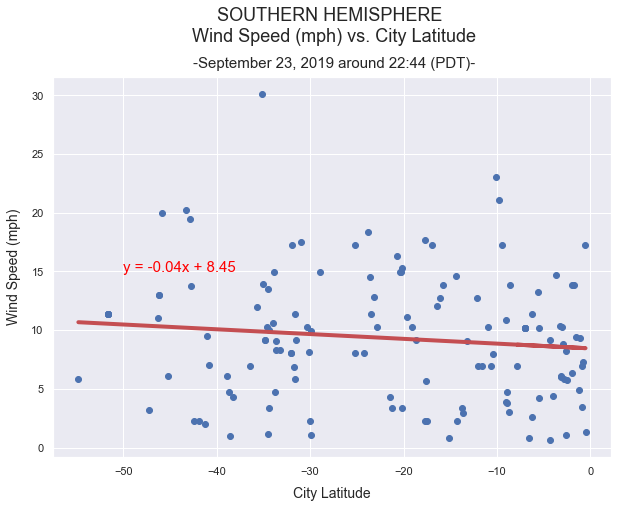

In [32]:
# Set figure size

fig_8 = plt.figure(figsize=(10,7))

# Plot the southern latitude and wind speed data as a scatter plot

plt.scatter(x_south_hemi, y_south_wind, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("SOUTHERN HEMISPHERE \n Wind Speed (mph) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-", x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Plot the line regression with the line formula

s_wind_slope, s_wind_int, s_wind_r, s_wind_p, s_wind_std_err = linregress(x_south_hemi, y_south_wind)
s_wind_fit = s_wind_slope*np.asarray(x_south_hemi)+s_wind_int
s_wind_line_eq = "y = " + str(round(s_wind_slope,2)) + "x + " + str(round(s_wind_int,2))
plt.annotate(s_wind_line_eq,(-50, 15),fontsize=15,color="red")
plt.plot(x_south_hemi,s_wind_fit,"r-",linewidth=4)

# Save the figure

fig_8.savefig('output_data/South_Wind_Speed_vs_Lat.png')

# Show plot

plt.show()

In [33]:
linregress(x_south_hemi, y_south_wind)

LinregressResult(slope=-0.04074040343657315, intercept=8.446382532667654, rvalue=-0.11710003960746829, pvalue=0.17137086717185915, stderr=0.0296278823517249)

In [34]:
print("R-squared: %f" % s_wind_r**2)
print(f"P-Value: {s_wind_p}")

R-squared: 0.013712
P-Value: 0.17137086717185915


In [35]:
# Close the plot

plt.close()